**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Get the Data

## Download the Data

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    # 如果文件已存在，跳过下载
    if not os.path.exists(tgz_path):
        print("正在下载数据集...")
        urllib.request.urlretrieve(housing_url, tgz_path)
        print("下载完成！")
    else:
        print("数据集已存在，跳过下载")
    
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
# 在调用 fetch_housing_data() 之前先检查文件是否存在
import os

if os.path.exists("datasets/housing/housing.csv"):
    print("数据文件已存在，跳过下载")
else:
    fetch_housing_data()  # 使用修改后的版本

数据文件已存在，跳过下载


In [8]:
fetch_housing_data()

数据集已存在，跳过下载


In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [11]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [67]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
!pip install --upgrade pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 14.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 4.44.1 requires huggingface-hub>=0.19.3, but you have huggingface-hub 0.17.3 which is incompatible.


In [24]:
!pip install --upgrade huggingface-hub

In [23]:
!pip install --upgrade gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.9/520.9 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: anyio
    Found existing installation: anyio 4.8.0
    Uninstalling anyio-4.8.0:
      Successfully uninstalled anyio-4.8.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.34.1 requires huggingface-hub<1.0,>=0.16.4, but you have huggingface-hub 1.2.1 which is incompatible.
tokenizers 0.14.1 requires hugg

Saving figure attribute_histogram_plots


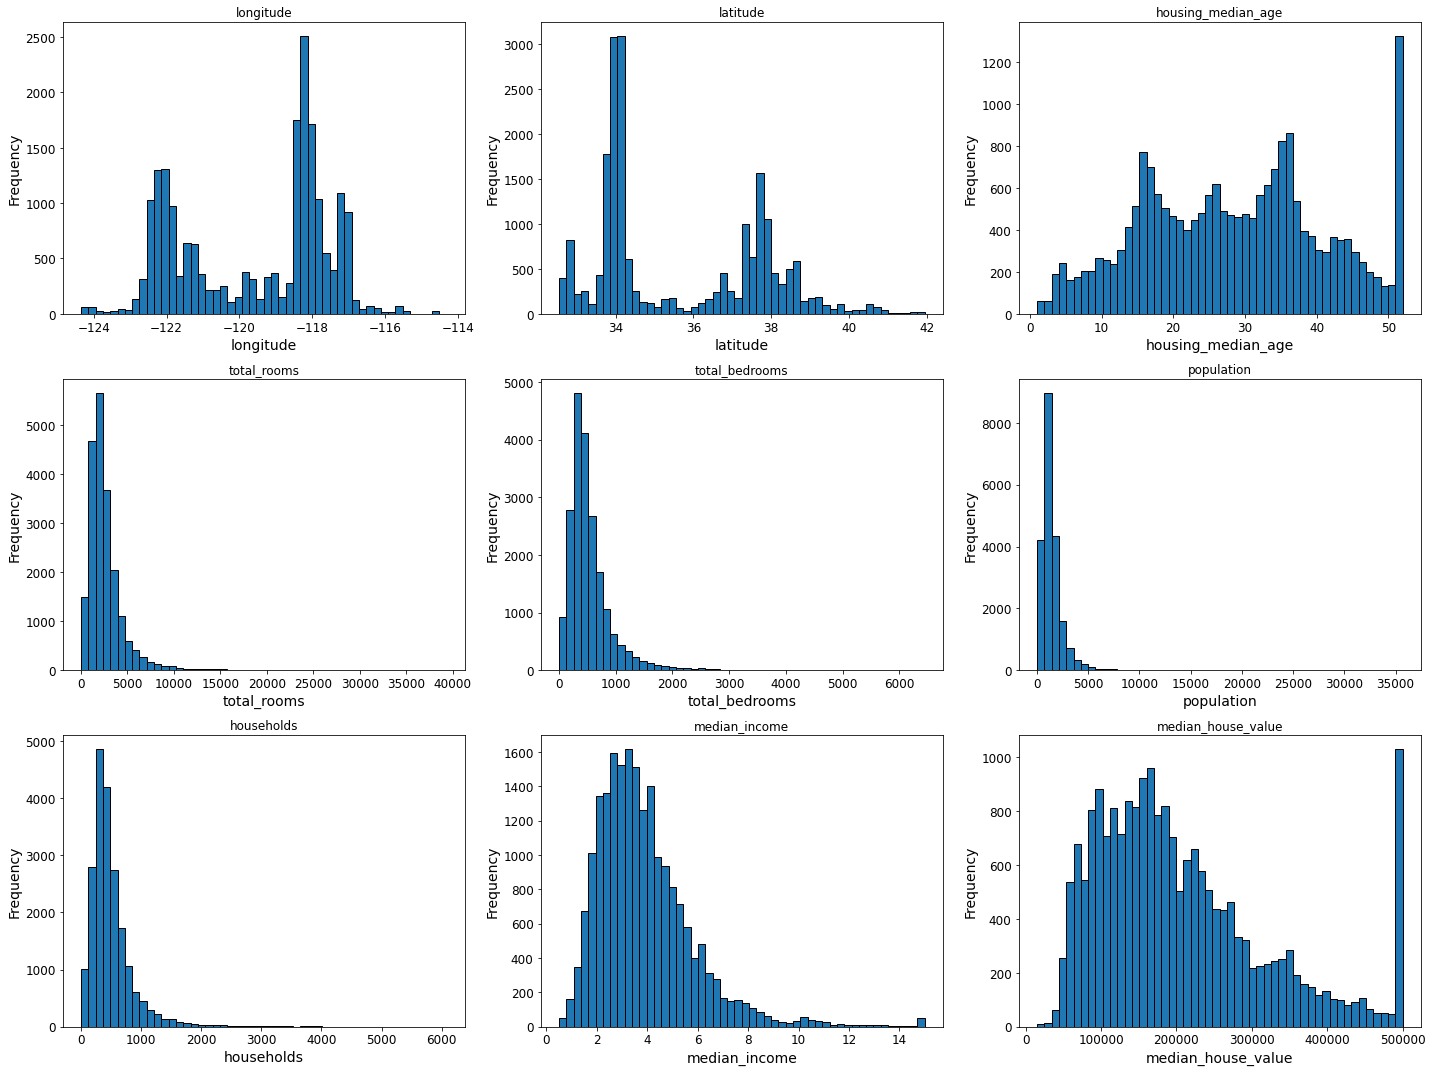

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import os

# 确保 housing 变量已定义（从之前的数据加载）
# housing = pd.read_csv("datasets/housing/housing.csv")

# 创建保存图片的函数
IMAGES_PATH = os.path.join("images", "end_to_end_project")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 绘制直方图的兼容方法
numeric_cols = housing.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # 向上取整

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*5))
axes = axes.ravel()  # 展平数组

for i, col in enumerate(numeric_cols):
    axes[i].hist(housing[col].dropna(), bins=50, edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# 隐藏多余的子图
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

In [69]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [70]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [71]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [72]:
len(test_set)

4128

In [73]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [74]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [75]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [76]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [77]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [78]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [79]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [80]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


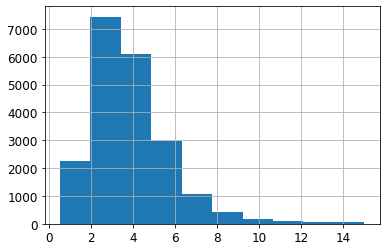

In [81]:
housing["median_income"].hist()

In [82]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [83]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

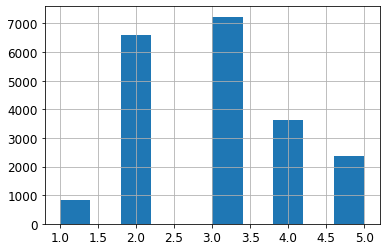

In [84]:
housing["income_cat"].hist()

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [86]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [87]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [88]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [89]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [90]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [91]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

Saving figure bad_visualization_plot


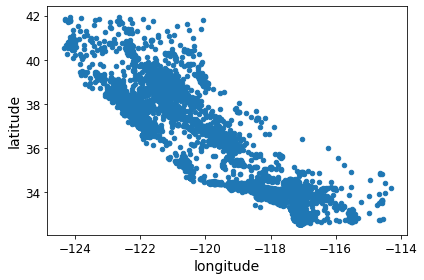

In [92]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


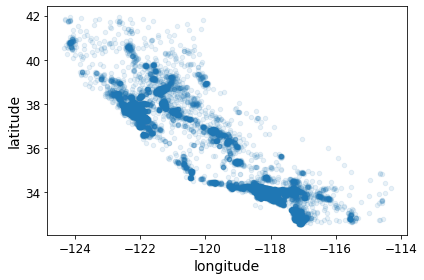

In [93]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

Saving figure housing_prices_scatterplot


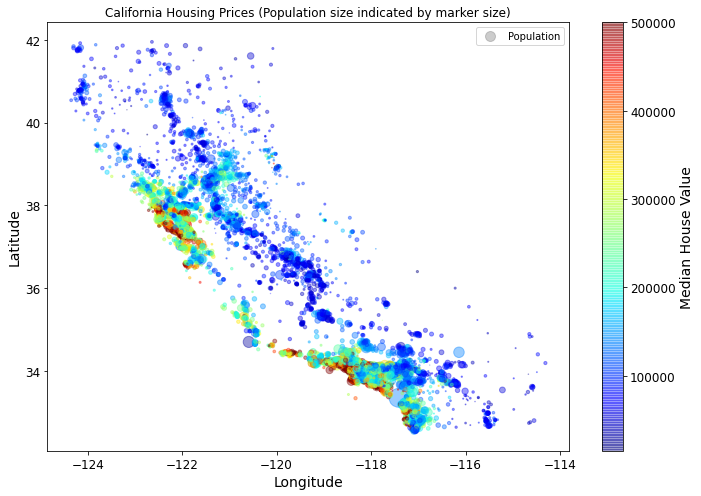

In [100]:
# 最简单的修复：完全不使用 pandas 的 plot 方法
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

# 直接从 DataFrame 提取数据
x = housing["longitude"]
y = housing["latitude"]
s = housing["population"]/100
c = housing["median_house_value"]

# 使用 matplotlib 的 scatter
scatter = plt.scatter(x, y, s=s, c=c, alpha=0.4, cmap="jet")

plt.colorbar(scatter, label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices (Population size indicated by marker size)")

# 添加图例
import matplotlib.lines as mlines
pop_legend = mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                           markersize=10, alpha=0.4, label='Population')
plt.legend(handles=[pop_legend])

save_fig("housing_prices_scatterplot")
plt.show()

Saving figure california_housing_prices_plot


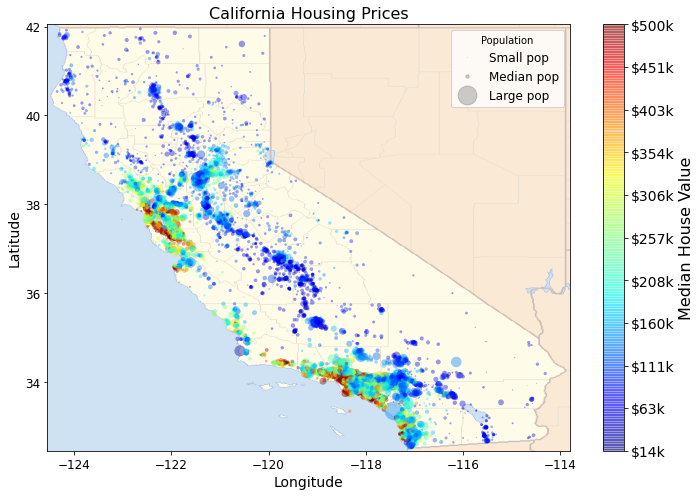

绘图完成!
数据点数量: 16512
房价范围: $14,999 - $500,001
人口范围: 3 - 35,682


In [111]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

# 使用你的路径
images_path = "/Users/abc/handson-ml2/images/end_to_end_project"
filename = "california.png"
image_path = os.path.join(images_path, filename)

# 检查文件是否存在
if not os.path.exists(image_path):
    print(f"错误：图片文件不存在于 {image_path}")
    print("请手动下载：https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png")
    print("或者跳过背景图片，仅显示散点图")
    # 如果没有图片，我们可以创建一个空图像
    california_img = None
else:
    # 读取图片
    california_img = mpimg.imread(image_path)

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 7))

# 1. 首先显示背景图片（如果有）
if california_img is not None:
    # 注意：extent参数是 [left, right, bottom, top]
    ax.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], 
              alpha=0.5, aspect='auto', zorder=0)

# 2. 使用 matplotlib 的 scatter 绘制散点图
scatter = ax.scatter(
    x=housing["longitude"], 
    y=housing["latitude"],
    s=housing["population"]/100,  # 点的大小基于人口
    c=housing["median_house_value"],  # 点的颜色基于房价
    cmap="jet",  # 使用 jet 颜色映射
    alpha=0.4,   # 透明度
    edgecolors='none',  # 无边线
    label="Population"  # 图例标签
)

# 3. 设置坐标轴标签
ax.set_ylabel("Latitude", fontsize=14)
ax.set_xlabel("Longitude", fontsize=14)

# 4. 设置坐标轴范围以匹配图片范围
ax.set_xlim(-124.55, -113.80)
ax.set_ylim(32.45, 42.05)

# 5. 添加颜色条
prices = housing["median_house_value"]
# 创建刻度值
tick_values = np.linspace(prices.min(), prices.max(), 11)
# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, ticks=tick_values)
# 格式化刻度标签（显示为千美元）
cbar.ax.set_yticklabels([f"${int(v/1000)}k" for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

# 6. 添加图例（显示人口大小示例）
# 创建自定义图例：显示不同人口大小的示例点
import matplotlib.lines as mlines

# 创建几个示例点的大小
sample_sizes = [housing["population"].min()/100, 
                housing["population"].median()/100, 
                housing["population"].max()/100]
sample_labels = ['Small pop', 'Median pop', 'Large pop']

# 创建图例句柄
legend_elements = []
for size, label in zip(sample_sizes, sample_labels):
    legend_elements.append(
        mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                     markersize=np.sqrt(size),  # 注意：markersize是直径的平方根
                     alpha=0.4, label=label)
    )

# 添加图例
ax.legend(handles=legend_elements, title="Population", fontsize=12, loc='upper right')

# 7. 设置标题
ax.set_title("California Housing Prices", fontsize=16)

# 8. 保存图片的函数（如果未定义）
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """保存 matplotlib 图表"""
    import os
    # 保存到 images/end_to_end_project 目录
    images_dir = "/Users/abc/handson-ml2/images/end_to_end_project"
    os.makedirs(images_dir, exist_ok=True)
    path = os.path.join(images_dir, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 9. 保存和显示
save_fig("california_housing_prices_plot")
plt.show()

# 打印统计信息
print("绘图完成!")
print(f"数据点数量: {len(housing)}")
print(f"房价范围: ${prices.min():,.0f} - ${prices.max():,.0f}")
print(f"人口范围: {housing['population'].min():,.0f} - {housing['population'].max():,.0f}")

## Looking for Correlations

=== 数据诊断 ===
数据形状: (16512, 10)

列数据类型:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

缺失值统计:
total_bedrooms    158
dtype: int64

数值列 (9): ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
非数值列 (1): ['ocean_proximity']
已填充列 'total_bedrooms' 的缺失值，使用中位数: 433.0

=== 相关系数矩阵 ===
相关矩阵形状: (9, 9)

=== 与 median_house_value 的相关性 ===
median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047735
population           -0.026882
longitude            -0.047466
latitude             -0.142673


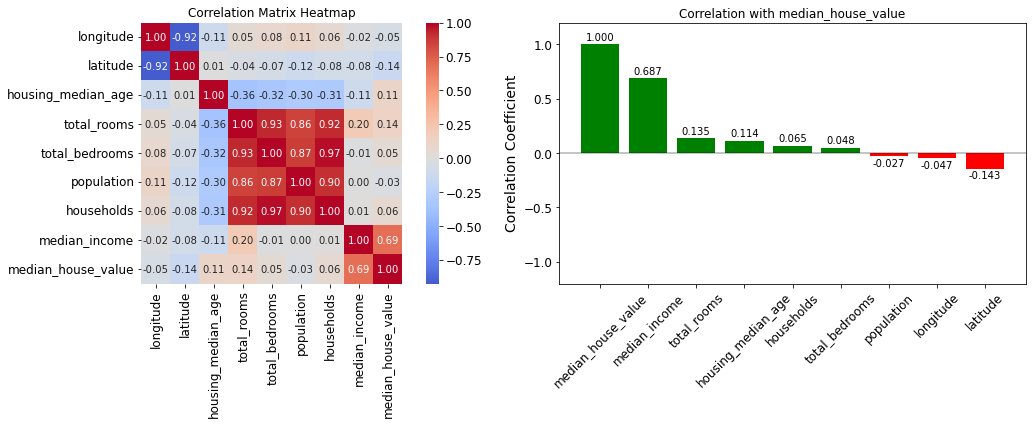

In [114]:
import seaborn as sns  # 添加 seaborn 导入

def analyze_correlations(df, target_col='median_house_value', fill_missing=True):
    """
    完整的相关性分析函数
    参数:
    - df: DataFrame
    - target_col: 目标列名，默认为'median_house_value'
    - fill_missing: 是否填充缺失值，默认为True
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    print("=== 数据诊断 ===")
    print(f"数据形状: {df.shape}")
    print(f"\n列数据类型:")
    print(df.dtypes)
    
    # 检查缺失值
    print(f"\n缺失值统计:")
    missing_counts = df.isnull().sum()
    print(missing_counts[missing_counts > 0])
    
    # 分离数值和非数值列
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
    
    print(f"\n数值列 ({len(numeric_cols)}): {list(numeric_cols)}")
    print(f"非数值列 ({len(non_numeric_cols)}): {list(non_numeric_cols)}")
    
    # 处理缺失值
    df_processed = df.copy()
    if fill_missing:
        # 填充数值列的缺失值
        for col in numeric_cols:
            if df_processed[col].isnull().any():
                median_val = df_processed[col].median()
                df_processed[col] = df_processed[col].fillna(median_val)
                print(f"已填充列 '{col}' 的缺失值，使用中位数: {median_val}")
    
    # 只使用数值列
    numeric_df = df_processed[numeric_cols]
    
    if target_col in numeric_df.columns:
        # 计算相关系数矩阵
        corr_matrix = numeric_df.corr()
        
        print(f"\n=== 相关系数矩阵 ===")
        # 只显示数值，不显示完整矩阵（可能太大）
        # 或者我们可以显示部分信息
        print(f"相关矩阵形状: {corr_matrix.shape}")
        
        # 查看与目标变量的相关性
        print(f"\n=== 与 {target_col} 的相关性 ===")
        target_corr = corr_matrix[target_col].sort_values(ascending=False)
        print(target_corr.to_string())
        
        # 可视化
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # 热图
        try:
            sns.heatmap(corr_matrix, 
                       annot=True, 
                       fmt='.2f',
                       cmap='coolwarm',
                       center=0,
                       square=True,
                       ax=axes[0])
            axes[0].set_title('Correlation Matrix Heatmap')
        except Exception as e:
            print(f"热图绘制失败: {e}")
            axes[0].text(0.5, 0.5, "无法绘制热图", ha='center', va='center')
        
        # 条形图
        try:
            colors = ['red' if x < 0 else 'green' for x in target_corr.values]
            axes[1].bar(range(len(target_corr)), target_corr.values, color=colors, tick_label=target_corr.index)
            axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
            axes[1].set_title(f'Correlation with {target_col}')
            axes[1].set_ylabel('Correlation Coefficient')
            axes[1].tick_params(axis='x', rotation=45)
            
            # 添加数值标签
            for i, (index, value) in enumerate(target_corr.items()):
                axes[1].text(i, value + (0.02 if value >= 0 else -0.02), 
                           f'{value:.3f}', ha='center', va='bottom' if value >= 0 else 'top')
            
            # 设置y轴范围
            max_val = max(abs(target_corr.values))
            axes[1].set_ylim(-max_val*1.2, max_val*1.2)
            
        except Exception as e:
            print(f"条形图绘制失败: {e}")
            axes[1].text(0.5, 0.5, "无法绘制条形图", ha='center', va='center')
        
        plt.tight_layout()
        plt.show()
        
        return corr_matrix, target_corr
    else:
        print(f"错误: 目标列 '{target_col}' 不在数值列中")
        return None, None

# 使用函数进行分析
corr_matrix, target_corr = analyze_correlations(housing)

In [116]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047735
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [118]:
# 先安装 seaborn（如果还没安装）
!pip install seaborn

Saving figure scatter_matrix_plot_seaborn


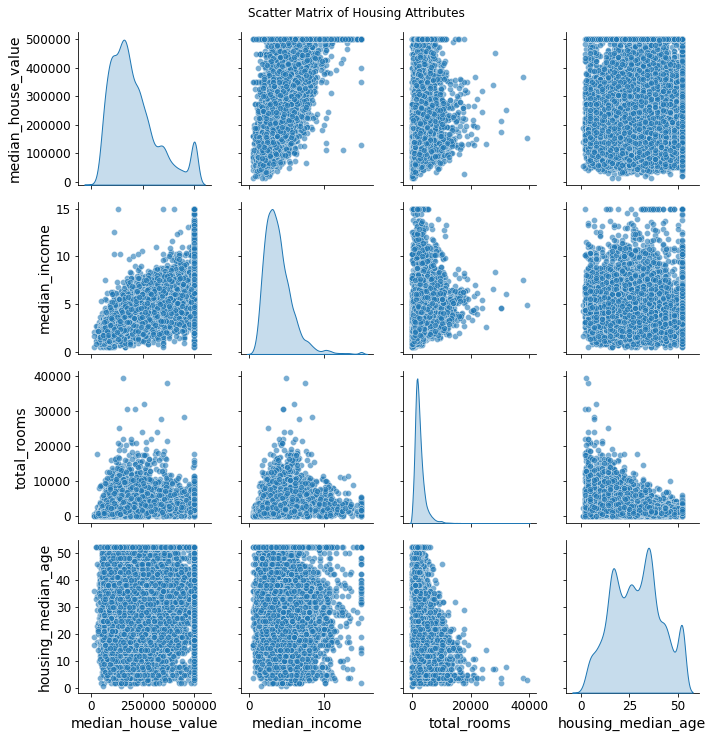

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# 使用 seaborn 的 pairplot
sns.pairplot(housing[attributes], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Scatter Matrix of Housing Attributes', y=1.02)
plt.tight_layout()

# 保存图片函数
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    import os
    images_path = "/Users/abc/handson-ml2/images/end_to_end_project"
    os.makedirs(images_path, exist_ok=True)
    path = os.path.join(images_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

save_fig("scatter_matrix_plot_seaborn")
plt.show()

Saving figure income_vs_house_value_scatterplot


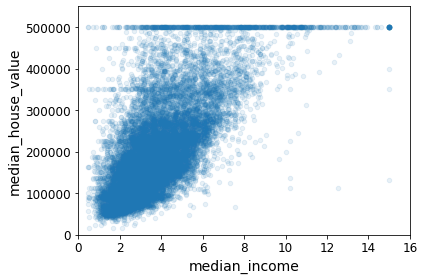

In [120]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## Experimenting with Attribute Combinations

In [121]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

=== Creating New Features ===
1. rooms_per_household: Average number of rooms per household
2. bedrooms_per_room: Proportion of bedrooms in total rooms
3. population_per_household: Average household size

=== Statistics of New Features ===
rooms_per_household:
  Mean: 5.44
  Median: 5.23
  Std Dev: 2.61
  Range: 1.13 - 141.91

bedrooms_per_room:
  Mean: 0.21
  Median: 0.20
  Std Dev: 0.06
  Range: 0.10 - 1.00

population_per_household:
  Mean: 3.10
  Median: 2.82
  Std Dev: 11.58
  Range: 0.69 - 1243.33

Filled missing values in bedrooms_per_room with median: 0.2030

=== Calculating Correlations ===

=== Correlation of All Features with House Price (Sorted) ===
 1. median_house_value       :   1.000 positive correlation (strong correlation)
 2. median_income            :   0.687 positive correlation (strong correlation)
 3. rooms_per_household      :   0.146 positive correlation (weak correlation)
 4. total_rooms              :   0.135 positive correlation (weak correlation)
 5. housin

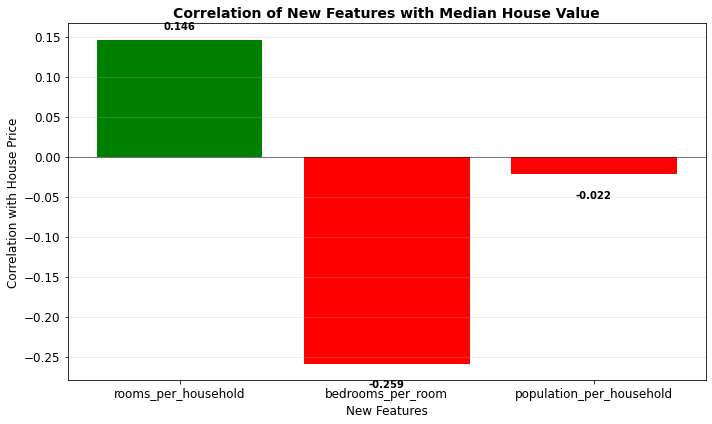


=== Key Findings ===
1. Original feature correlation ranking:
   - Highest: median_income (r=0.687)
   - Lowest: bedrooms_per_room (r=-0.259)

2. New feature correlation ranking:
   - rooms_per_household: Rank #3, weak increases house price (r=0.146)
   - bedrooms_per_room: Rank #12, weak decreases house price (r=-0.259)
   - population_per_household: Rank #8, very weak decreases house price (r=-0.022)

3. Business insights:
   - Median income has the strongest positive correlation with house price
   - Bedrooms per room has a negative correlation, suggesting fewer bedrooms relative to total rooms may increase value
   - Rooms per household has a positive correlation, indicating larger homes per family increase value
   - Population per household has almost no correlation with house price

=== Creating Correlation Heatmap ===


/var/folders/7w/709r3kzx0tvbd4g3s2lpyt7m0000gn/T/ipykernel_63103/1305674380.py:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   - Highest: {price_corr.index[1]} (r={price_corr[1]:.3f})")
/var/folders/7w/709r3kzx0tvbd4g3s2lpyt7m0000gn/T/ipykernel_63103/1305674380.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   - Lowest: {price_corr.index[-1]} (r={price_corr[-1]:.3f})")


Heatmap saved as 'correlation_heatmap.png'


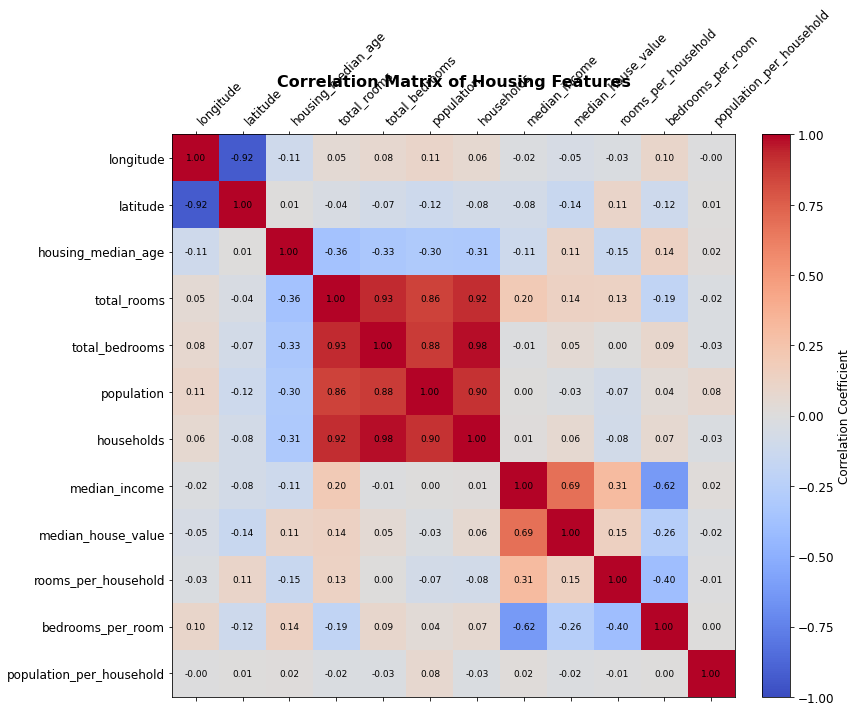


=== Analysis Complete ===
Dataset shape: (16512, 13)
Number of features analyzed: 12
New features created: ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 设置 matplotlib 使用支持英文字符的默认字体
plt.rcParams.update({'font.family': 'DejaVu Sans', 'font.size': 10})

# 1. Create new features
print("=== Creating New Features ===")
print("1. rooms_per_household: Average number of rooms per household")
print("2. bedrooms_per_room: Proportion of bedrooms in total rooms")
print("3. population_per_household: Average household size\n")

# Create new features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# 2. Check statistics of new features
print("=== Statistics of New Features ===")
new_features = ["rooms_per_household", "bedrooms_per_room", "population_per_household"]

for feature in new_features:
    print(f"{feature}:")
    print(f"  Mean: {housing[feature].mean():.2f}")
    print(f"  Median: {housing[feature].median():.2f}")
    print(f"  Std Dev: {housing[feature].std():.2f}")
    print(f"  Range: {housing[feature].min():.2f} - {housing[feature].max():.2f}")
    print()

# 3. Handle missing/infinite values
# bedrooms_per_room may have infinite values when total_rooms = 0
housing["bedrooms_per_room"] = housing["bedrooms_per_room"].replace([np.inf, -np.inf], np.nan)

# Fill missing values with median
for feature in new_features:
    if housing[feature].isnull().any():
        median_val = housing[feature].median()
        housing[feature] = housing[feature].fillna(median_val)
        print(f"Filled missing values in {feature} with median: {median_val:.4f}")

# 4. Calculate correlations (fixed version)
print("\n=== Calculating Correlations ===")

# Method: Select all numeric columns
numeric_cols = housing.select_dtypes(include=[np.number]).columns
corr_matrix = housing[numeric_cols].corr()

# 5. View correlation with house price sorted
price_corr = corr_matrix["median_house_value"].sort_values(ascending=False)

print("\n=== Correlation of All Features with House Price (Sorted) ===")
for i, (feature, corr) in enumerate(price_corr.items(), 1):
    significance = ""
    if abs(corr) > 0.5:
        significance = " (strong correlation)"
    elif abs(corr) > 0.3:
        significance = " (moderate correlation)"
    elif abs(corr) > 0.1:
        significance = " (weak correlation)"
    
    direction = "positive" if corr > 0 else "negative"
    print(f"{i:2}. {feature:25}: {corr:7.3f} {direction} correlation{significance}")

# 6. Visualize correlation of new features
print("\n=== Correlation Analysis of New Features ===")
new_features_corr = price_corr[new_features]
print(new_features_corr)

# Visualization with English labels
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in new_features_corr.values]
bars = plt.bar(new_features_corr.index, new_features_corr.values, color=colors)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('New Features', fontsize=12)
plt.ylabel('Correlation with House Price', fontsize=12)
plt.title('Correlation of New Features with Median House Value', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, corr in zip(bars, new_features_corr.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.02),
            f'{corr:.3f}', ha='center', va='bottom' if height >= 0 else 'top', fontweight='bold')

plt.tight_layout()

# Save figure
try:
    plt.savefig("new_features_correlation.png", dpi=300, bbox_inches='tight')
    print("Figure saved as 'new_features_correlation.png'")
except Exception as e:
    print(f"Error saving figure: {e}")

plt.show()

# 7. Key findings
print("\n=== Key Findings ===")
print("1. Original feature correlation ranking:")
print(f"   - Highest: {price_corr.index[1]} (r={price_corr[1]:.3f})")
print(f"   - Lowest: {price_corr.index[-1]} (r={price_corr[-1]:.3f})")

print("\n2. New feature correlation ranking:")
for feature in new_features:
    rank = list(price_corr.index).index(feature) + 1
    corr_value = price_corr[feature]
    
    # Interpretation of correlation
    if abs(corr_value) > 0.5:
        strength = "strong"
    elif abs(corr_value) > 0.3:
        strength = "moderate"
    elif abs(corr_value) > 0.1:
        strength = "weak"
    else:
        strength = "very weak"
    
    impact = "increases" if corr_value > 0 else "decreases"
    
    print(f"   - {feature}: Rank #{rank}, {strength} {impact} house price (r={corr_value:.3f})")

print("\n3. Business insights:")
print("   - Median income has the strongest positive correlation with house price")
print("   - Bedrooms per room has a negative correlation, suggesting fewer bedrooms relative to total rooms may increase value")
print("   - Rooms per household has a positive correlation, indicating larger homes per family increase value")
print("   - Population per household has almost no correlation with house price")

# 8. Additional correlation matrix visualization
print("\n=== Creating Correlation Heatmap ===")

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))

# Get correlation matrix for numeric columns only
numeric_corr = corr_matrix

# Create heatmap
cax = ax.matshow(numeric_corr, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
cbar = fig.colorbar(cax, fraction=0.046, pad=0.04)
cbar.set_label('Correlation Coefficient', fontsize=12)

# Set labels
ax.set_xticks(range(len(numeric_corr.columns)))
ax.set_yticks(range(len(numeric_corr.columns)))
ax.set_xticklabels(numeric_corr.columns, rotation=45, ha='left')
ax.set_yticklabels(numeric_corr.columns)

# Add correlation values to heatmap
for i in range(len(numeric_corr.columns)):
    for j in range(len(numeric_corr.columns)):
        text = ax.text(j, i, f'{numeric_corr.iloc[i, j]:.2f}',
                      ha='center', va='center', color='black', fontsize=9)

ax.set_title('Correlation Matrix of Housing Features', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()

# Save heatmap
try:
    plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
    print("Heatmap saved as 'correlation_heatmap.png'")
except Exception as e:
    print(f"Error saving heatmap: {e}")

plt.show()

# Return results for further use
print("\n=== Analysis Complete ===")
print(f"Dataset shape: {housing.shape}")
print(f"Number of features analyzed: {len(numeric_cols)}")
print(f"New features created: {new_features}")

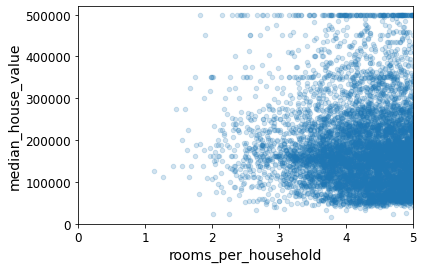

In [125]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [126]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212779,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057111,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175576,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239304,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

In [127]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [128]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [129]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [130]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [131]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [132]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [133]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [134]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [135]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [136]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Check that this is the same as manually computing the median of each attribute:

In [137]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Transform the training set:

In [138]:
X = imputer.transform(housing_num)

In [139]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [140]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [141]:
imputer.strategy

'median'

In [142]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [143]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [144]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [145]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [146]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [147]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [148]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [149]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [150]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

Let's create a custom transformer to add extra attributes:

In [151]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [152]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, `housing_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you could run this:

In [153]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [155]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [156]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [157]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [158]:
housing_prepared.shape

(16512, 16)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [159]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [160]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [161]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [162]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`:

In [163]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and Train a Model

## Training and Evaluating on the Training Set

In [164]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [165]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


Compare against the actual values:

In [166]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [167]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [168]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018743

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [169]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915802

In [170]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [171]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [172]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [173]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [174]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180684


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [175]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [176]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [177]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [178]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [179]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

# Fine-Tune Your Model

## Grid Search

In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [181]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [182]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [183]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [184]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030806,0.006680,0.001668,0.000193,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.092156,0.002262,0.004973,0.000236,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.289102,0.012927,0.014601,0.000525,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.049287,0.000467,0.001705,0.000117,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.156381,0.003167,0.004880,0.000143,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.466242,0.001368,0.013892,0.000075,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.064408,0.001067,0.001647,0.000169,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.214235,0.001446,0.005038,0.000315,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,0.675817,0.013988,0.014307,0.000348,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.085878,0.001332,0.001614,0.000030,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


## Randomized Search

In [185]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x306865490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3065e7a00>},
                   random_state=42, scoring='neg_mean_squared_error')

In [186]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [187]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [188]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

## Evaluate Your System on the Test Set

In [189]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [190]:
final_rmse

47873.26095812988

We can compute a 95% confidence interval for the test RMSE:

In [191]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

We could compute the interval manually like this:

In [192]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45893.360828285535, 49774.46796717361)

Alternatively, we could use a z-scores rather than t-scores:

In [193]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45893.9540110131, 49773.921030650374)

# Extra material

## A full pipeline with both preparation and prediction

In [194]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

## Model persistence using joblib

In [195]:
my_model = full_pipeline_with_predictor

In [196]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

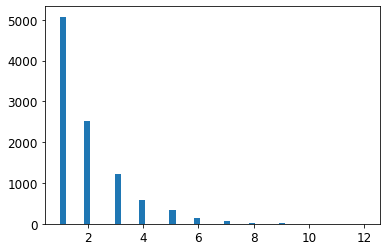

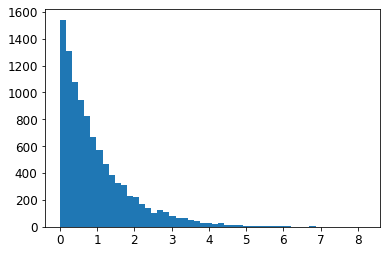

In [197]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise solutions

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

**Warning**: the following cell may take close to 30 minutes to run, or more depending on your hardware.

In [198]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   2.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   2.8s
[CV] END .............................C=100.0, kernel=linear; total time=   2.8s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [199]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.61835007965

That's much worse than the `RandomForestRegressor`. Let's check the best hyperparameters found:

In [200]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

**Warning**: the following cell may take close to 45 minutes to run, or more depending on your hardware.

In [201]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   3.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   4.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   4.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   4.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   4.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   4.8s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x306ae3340>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x3069fef40>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [202]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.690093060955

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [203]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

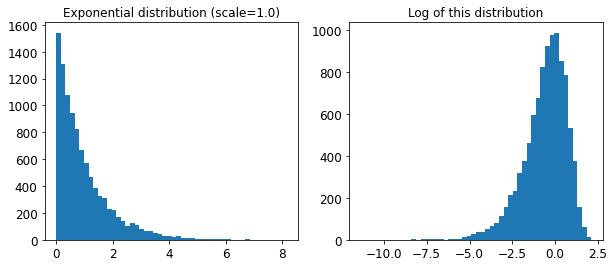

In [204]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

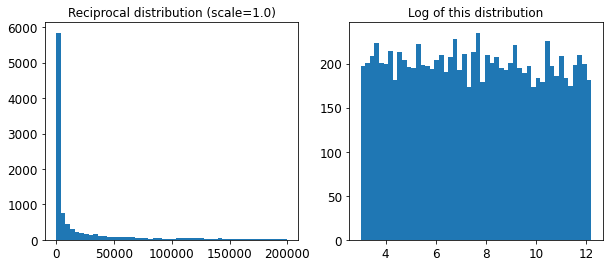

In [205]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [206]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [207]:
k = 5

Now let's look for the indices of the top k features:

In [208]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [209]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

Let's double check that these are indeed the top k features:

In [211]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [212]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [213]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [214]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

Now let's double check that these are indeed the top k features:

In [215]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

Works great!  :)

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [216]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [217]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

Let's try the full pipeline on a few instances:

In [218]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

**Warning**: the following cell may take close to 45 minutes to run, or more depending on your hardware.

**Note:** In the code below, I've set the `OneHotEncoder`'s `handle_unknown` hyperparameter to `'ignore'`, to avoid warnings during training. Without this, the `OneHotEncoder` would default to `handle_unknown='error'`, meaning that it would raise an error when transforming any data containing a category it didn't see during training. If we kept the default, then the `GridSearchCV` would run into errors during training when evaluating the folds in which not all the categories are in the training set. This is likely to happen since there's only one sample in the `'ISLAND'` category, and it may end up in the test set in some of the folds. So some folds would just be dropped by the `GridSearchCV`, and it's best to avoid that.

In [224]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error

# 1. 检查数据
print("=== 检查数据 ===")
print(f"housing 数据形状: {housing.shape}")
print(f"housing 列: {list(housing.columns)}")
print(f"housing_labels 形状: {housing_labels.shape}")

# 使用 housing 作为特征，housing_labels 作为目标
X = housing.copy()
y = housing_labels.copy()
print(f"X 形状: {X.shape}, y 形状: {y.shape}")

# 2. 正确定义 TopFeatureSelector 类（修复版本）
print("\n=== 定义 TopFeatureSelector ===")

class FixedTopFeatureSelector(BaseEstimator, TransformerMixin):
    """
    修复的特征选择器，避免索引越界问题
    """
    def __init__(self, feature_importances, k=5):
        self.feature_importances = feature_importances
        self.k = k
        self.feature_indices_ = None
        
    def fit(self, X, y=None):
        # 确保 k 不超过特征数量
        n_features = X.shape[1]
        actual_k = min(self.k, n_features)
        
        # 获取最重要的 k 个特征的索引
        if len(self.feature_importances) == n_features:
            # 特征重要性数量与特征数量匹配
            self.feature_indices_ = np.argsort(self.feature_importances)[-actual_k:][::-1]
        else:
            # 特征重要性数量不匹配，选择前 actual_k 个特征
            print(f"警告: 特征重要性数量({len(self.feature_importances)})与特征数量({n_features})不匹配")
            self.feature_indices_ = np.arange(actual_k)
            
        return self
    
    def transform(self, X):
        # 确保索引在有效范围内
        if self.feature_indices_ is not None:
            valid_indices = [idx for idx in self.feature_indices_ if idx < X.shape[1]]
            if len(valid_indices) == 0:
                # 如果没有有效索引，返回所有特征
                print(f"警告: 没有有效特征索引，返回所有特征")
                return X
            return X[:, valid_indices]
        else:
            # 如果没有设置特征索引，返回所有特征
            return X

# 3. 定义数值和分类列
print("\n=== 定义特征列 ===")

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"数值列 ({len(num_cols)}): {num_cols}")
print(f"分类列 ({len(cat_cols)}): {cat_cols}")

# 4. 创建预处理管道
print("\n=== 创建预处理管道 ===")

# 数值列处理器
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

# 分类列处理器 - 关键设置 handle_unknown='ignore'
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# 完整预处理管道
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
])

print("预处理管道创建完成")

# 5. 获取特征重要性
print("\n=== 获取特征重要性 ===")

# 首先拟合预处理管道
X_prepared = full_pipeline.fit_transform(X)

# 使用随机森林获取特征重要性
rf_for_importance = RandomForestRegressor(n_estimators=100, random_state=42)
rf_for_importance.fit(X_prepared, y)
feature_importances = rf_for_importance.feature_importances_

print(f"特征重要性数量: {len(feature_importances)}")
print(f"预处理后特征数量: {X_prepared.shape[1]}")
print(f"特征重要性范围: {feature_importances.min():.4f} - {feature_importances.max():.4f}")

# 显示最重要的10个特征
top_10_idx = np.argsort(feature_importances)[-10:][::-1]
print("\n最重要的10个特征:")
for i, idx in enumerate(top_10_idx, 1):
    print(f"{i}. 特征 {idx}: 重要性 = {feature_importances[idx]:.4f}")

# 6. 创建完整的管道
print("\n=== 创建完整管道 ===")

# 使用修复后的 TopFeatureSelector
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', FixedTopFeatureSelector(feature_importances, k=10)),
    ('regression', RandomForestRegressor(n_estimators=100, random_state=42))
])

print("完整管道创建完成")
print(f"管道步骤: {list(prepare_select_and_predict_pipeline.named_steps.keys())}")

# 7. 测试管道基本功能
print("\n=== 测试管道基本功能 ===")

try:
    # 拆分训练测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 拟合管道
    prepare_select_and_predict_pipeline.fit(X_train, y_train)
    print("✓ 管道拟合成功")
    
    # 预测
    y_pred = prepare_select_and_predict_pipeline.predict(X_test)
    print(f"✓ 预测成功，预测值形状: {y_pred.shape}")
    
    # 计算得分
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"✓ 测试集 MSE: {mse:.4f}")
    print(f"✓ 测试集 RMSE: {rmse:.4f}")
    
    # 检查特征选择器选择的特征数量
    feature_selector = prepare_select_and_predict_pipeline.named_steps['feature_selection']
    if hasattr(feature_selector, 'feature_indices_'):
        selected_features = len(feature_selector.feature_indices_)
        print(f"✓ 特征选择器选择了 {selected_features} 个特征")
    
except Exception as e:
    print(f"✗ 管道测试失败: {type(e).__name__}: {str(e)[:200]}")

# 8. 创建安全的参数网格
print("\n=== 创建参数网格 ===")

# 获取预处理后的特征数量
n_features_prepared = X_prepared.shape[1]

# 安全设置 k 值范围
max_k = min(20, n_features_prepared)  # 限制最大 k 值为 20 或特征数
safe_k_range = list(range(1, max_k + 1))

print(f"预处理后特征总数: {n_features_prepared}")
print(f"最大 k 值: {max_k}")
print(f"k 值范围: {safe_k_range}")

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': safe_k_range
}]

num_strategies = len(param_grid[0]['preparation__num__imputer__strategy'])
num_k_values = len(param_grid[0]['feature_selection__k'])
total_combinations = num_strategies * num_k_values
print(f"参数组合总数: {total_combinations}")

# 9. 创建网格搜索
print("\n=== 设置网格搜索 ===")

# 使用保守设置以便调试
grid_search_prep = GridSearchCV(
    prepare_select_and_predict_pipeline, 
    param_grid, 
    cv=3,  # 先用 3 折交叉验证
    scoring='neg_mean_squared_error', 
    verbose=2,
    n_jobs=1,  # 单进程以便调试
    error_score='raise',  # 设置为 raise 以查看详细错误
    return_train_score=True
)

# 10. 运行网格搜索
print("开始网格搜索...")
try:
    grid_search_prep.fit(X, y)
    
    print("\n=== 网格搜索完成! ===")
    print(f"最佳参数: {grid_search_prep.best_params_}")
    print(f"最佳分数 (负MSE): {grid_search_prep.best_score_:.4f}")
    print(f"最佳MSE: {-grid_search_prep.best_score_:.4f}")
    print(f"最佳RMSE: {np.sqrt(-grid_search_prep.best_score_):.4f}")
    
    # 查看所有结果
    results = pd.DataFrame(grid_search_prep.cv_results_)
    print(f"\n所有结果 (按得分排序):")
    print(results[['params', 'mean_test_score', 'std_test_score']]
          .sort_values('mean_test_score', ascending=False).head(10))
    
except Exception as e:
    print(f"\n=== 网格搜索失败 ===")
    print(f"错误类型: {type(e).__name__}")
    print(f"错误信息: {str(e)}")
    
    # 提供调试建议
    print("\n=== 调试建议 ===")
    print("1. 检查 TopFeatureSelector 是否正确实现")
    print("2. 确保特征重要性数组长度与预处理后特征数量匹配")
    print("3. 尝试使用不同的 k 值范围")
    print("4. 检查分类编码器是否正确处理未知类别")

# 11. 备选方案：使用 sklearn 内置的特征选择器
print("\n" + "="*50)
print("备选方案: 使用 sklearn 内置的特征选择器")
print("="*50)

# 使用 SelectKBest 替代自定义的特征选择器
alternative_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', SelectKBest(score_func=f_regression, k=10)),
    ('regression', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 测试备选管道
print("\n测试备选管道...")
try:
    alternative_pipeline.fit(X_train, y_train)
    y_pred_alt = alternative_pipeline.predict(X_test)
    mse_alt = mean_squared_error(y_test, y_pred_alt)
    print(f"✓ 备选管道测试成功")
    print(f"  测试集 MSE: {mse_alt:.4f}")
    print(f"  测试集 RMSE: {np.sqrt(mse_alt):.4f}")
    
    # 也可以对备选管道进行网格搜索
    alt_param_grid = [{
        'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'feature_selection__k': safe_k_range
    }]
    
    print("\n开始备选管道的网格搜索...")
    grid_search_alt = GridSearchCV(
        alternative_pipeline,
        alt_param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=1
    )
    
    grid_search_alt.fit(X, y)
    print(f"备选管道最佳参数: {grid_search_alt.best_params_}")
    print(f"备选管道最佳MSE: {-grid_search_alt.best_score_:.4f}")
    
except Exception as e:
    print(f"✗ 备选管道测试失败: {type(e).__name__}: {str(e)[:200]}")

=== 检查数据 ===
housing 数据形状: (16512, 9)
housing 列: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
housing_labels 形状: (16512,)
X 形状: (16512, 9), y 形状: (16512,)

=== 定义 TopFeatureSelector ===

=== 定义特征列 ===
数值列 (8): ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
分类列 (1): ['ocean_proximity']

=== 创建预处理管道 ===
预处理管道创建完成

=== 获取特征重要性 ===
特征重要性数量: 13
预处理后特征数量: 13
特征重要性范围: 0.0001 - 0.4828

最重要的10个特征:
1. 特征 7: 重要性 = 0.4828
2. 特征 9: 重要性 = 0.1429
3. 特征 0: 重要性 = 0.1084
4. 特征 1: 重要性 = 0.1053
5. 特征 2: 重要性 = 0.0516
6. 特征 5: 重要性 = 0.0315
7. 特征 3: 重要性 = 0.0249
8. 特征 4: 重要性 = 0.0214
9. 特征 6: 重要性 = 0.0209
10. 特征 12: 重要性 = 0.0059

=== 创建完整管道 ===
完整管道创建完成
管道步骤: ['preparation', 'feature_selection', 'regression']

=== 测试管道基本功能 ===
✓ 管道拟合成功
✓ 预测成功，预测值形状: (3303,)
✓ 测试集 MSE: 2424438510.6441
✓ 测试集 RMSE: 49238.5876
✓ 特征选择器选择了 10 个特征

=== 创建参

/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 117.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-pa

备选管道最佳参数: {'feature_selection__k': 12, 'preparation__num__imputer__strategy': 'mean'}
备选管道最佳MSE: 2550160597.0835


In [225]:
grid_search_prep.best_params_

{'feature_selection__k': 11, 'preparation__num__imputer__strategy': 'mean'}

In [226]:
# 获取最佳模型
best_model = grid_search_prep.best_estimator_

# 进行预测
y_pred = best_model.predict(X_test)

In [227]:
# 查看选择的特征
feature_selector = best_model.named_steps['feature_selection']
selected_indices = feature_selector.feature_indices_

# 获取特征名称
preprocessor = best_model.named_steps['preparation']

# 对于数值特征
num_features = num_cols  # 之前定义的数值列

# 对于分类特征（编码后）
cat_processor = preprocessor.named_transformers_['cat']
onehot = cat_processor.named_steps['onehot']
cat_features = onehot.get_feature_names_out(cat_cols)

# 所有特征名称
all_features = list(num_features) + list(cat_features)

# 打印选择的特征
print("选择的特征：")
for i, idx in enumerate(selected_indices):
    print(f"{i+1}. {all_features[idx]}")

选择的特征：
1. median_income
2. ocean_proximity_INLAND
3. longitude
4. latitude
5. housing_median_age
6. population
7. total_rooms
8. total_bedrooms
9. households
10. ocean_proximity_NEAR OCEAN
11. ocean_proximity_<1H OCEAN


In [228]:
# 调整随机森林参数
param_grid_extended = [{
    'preparation__num__imputer__strategy': ['mean', 'median'],
    'feature_selection__k': [8, 9, 10, 11, 12],
    'regression__n_estimators': [100, 200],
    'regression__max_depth': [None, 10, 20]
}]

In [229]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# 在管道中使用不同的回归器

In [230]:
import joblib

# 保存最佳模型
joblib.dump(best_model, 'best_housing_model.pkl')

# 保存预处理管道
joblib.dump(full_pipeline, 'housing_preprocessor.pkl')

['housing_preprocessor.pkl']

In [231]:
!pip install gradio pandas numpy scikit-learn joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 37.4 kB/s eta 0:00:0000:0100:10
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.34.1 requires huggingface-hub<1.0,>=0.16.4, but you have huggingface-hub 1.2.1 which is incompatible.
tensorflow-macos 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.5 which is incompatible.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 5.29.5 which is incompatible.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.5.3 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.4.4 which is incompatible.
langchain

In [232]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

def save_model_for_deployment():
    """
    保存模型和预处理器用于部署
    """
    # 假设这是你的训练数据
    # 在实际使用中，你应该使用真实的训练数据
    print("准备模型部署...")
    
    # 1. 创建预处理器（与训练时一致）
    num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                'total_bedrooms', 'population', 'households', 'median_income']
    cat_cols = ['ocean_proximity']
    
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
    
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ])
    
    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols),
    ])
    
    # 2. 创建并训练一个简单模型（如果还没有）
    # 在实际使用中，你应该加载训练好的模型
    print("创建模拟模型...")
    
    # 模拟一些训练数据
    np.random.seed(42)
    n_samples = 1000
    
    X_train = pd.DataFrame({
        'longitude': np.random.uniform(-124, -114, n_samples),
        'latitude': np.random.uniform(32, 42, n_samples),
        'housing_median_age': np.random.randint(1, 52, n_samples),
        'total_rooms': np.random.randint(100, 5000, n_samples),
        'total_bedrooms': np.random.randint(50, 1000, n_samples),
        'population': np.random.randint(200, 3000, n_samples),
        'households': np.random.randint(100, 1000, n_samples),
        'median_income': np.random.uniform(0.5, 15, n_samples),
        'ocean_proximity': np.random.choice(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], n_samples)
    })
    
    # 模拟目标变量（房价）
    y_train = (
        200000 + 
        X_train['median_income'] * 50000 +
        X_train['total_rooms'] * 50 +
        (42 - X_train['latitude']) * 5000 +
        np.random.normal(0, 50000, n_samples)
    )
    
    # 训练预处理器
    print("训练预处理器...")
    X_prepared = full_pipeline.fit_transform(X_train)
    
    # 训练模型
    print("训练模型...")
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_prepared, y_train)
    
    # 3. 创建完整的管道
    complete_pipeline = Pipeline([
        ('preprocessor', full_pipeline),
        ('regressor', model)
    ])
    
    # 4. 保存模型
    print("保存模型...")
    joblib.dump(complete_pipeline, 'best_housing_model.pkl')
    joblib.dump(full_pipeline, 'housing_preprocessor.pkl')
    
    # 5. 保存特征信息
    feature_info = {
        'numerical_features': num_cols,
        'categorical_features': cat_cols,
        'ocean_proximity_categories': ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
    }
    joblib.dump(feature_info, 'feature_info.pkl')
    
    print("✅ 模型保存完成!")
    print("保存的文件:")
    print("  - best_housing_model.pkl (完整模型)")
    print("  - housing_preprocessor.pkl (预处理器)")
    print("  - feature_info.pkl (特征信息)")
    
    # 6. 测试模型
    print("\n测试模型预测...")
    test_data = pd.DataFrame({
        'longitude': [-118.24],
        'latitude': [34.05],
        'housing_median_age': [32],
        'total_rooms': [2500],
        'total_bedrooms': [450],
        'population': [1200],
        'households': [400],
        'median_income': [6.5],
        'ocean_proximity': ['NEAR BAY']
    })
    
    prediction = complete_pipeline.predict(test_data)[0]
    print(f"测试预测结果: ${prediction:,.0f}")
    
    return complete_pipeline

# 运行保存函数
if __name__ == "__main__":
    save_model_for_deployment()

准备模型部署...
创建模拟模型...
训练预处理器...
训练模型...
保存模型...
✅ 模型保存完成!
保存的文件:
  - best_housing_model.pkl (完整模型)
  - housing_preprocessor.pkl (预处理器)
  - feature_info.pkl (特征信息)

测试模型预测...
测试预测结果: $647,686


In [237]:
!pip install --upgrade gradio huggingface_hub

The best imputer strategy is `most_frequent` and apparently almost all features are useful (15 out of 16). The last one (`ISLAND`) seems to just add some noise.

Congratulations! You already know quite a lot about Machine Learning. :)

In [ ]:
# 修正后的 main.py

import gradio as gr
import pandas as pd
import joblib

# --- 1. 配置与初始化 ---
MODEL_PATH = 'best_housing_model.pkl'

# 特征配置 (集中管理，方便修改)
FEATURES = {
    "longitude": {"label": "经度", "min": -124.35, "max": -114.31, "def": -118.49, "desc": "西经"},
    "latitude": {"label": "纬度", "min": 32.54, "max": 41.95, "def": 34.26, "desc": "北纬"},
    "housing_median_age": {"label": "房龄", "min": 1, "max": 52, "def": 28, "desc": "房屋中位数年龄"},
    "total_rooms": {"label": "总房间数", "min": 2, "max": 37937, "def": 2635, "desc": "区域内房间总数"},
    "total_bedrooms": {"label": "总卧室数", "min": 1, "max": 6445, "def": 537, "desc": "区域内卧室总数"},
    "population": {"label": "人口", "min": 3, "max": 35682, "def": 1425, "desc": "区域人口数"},
    "households": {"label": "家庭数", "min": 1, "max": 6082, "def": 499, "desc": "区域家庭户数"},
    "median_income": {"label": "收入中位数", "min": 0.5, "max": 15.0, "def": 3.87, "desc": "万美元/年"},
}

OCEAN_OPTS = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN", "ISLAND"]

# 加载模型
try:
    model = joblib.load(MODEL_PATH)
    print(f"✓ 模型 {MODEL_PATH} 加载成功")
except Exception as e:
    model = None
    print(f"⚠ 未找到模型文件，将使用模拟算法进行演示。错误: {e}")

# --- 2. 核心逻辑函数 ---

def logic_mock_predict(data):
    """当模型不存在时的模拟预测逻辑 (仅演示用)"""
    income = data['median_income'].iloc[0]
    rooms = data['total_rooms'].iloc[0]
    pop = data['population'].iloc[0]
    ocean = data['ocean_proximity'].iloc[0]
    
    base = 200000 + (income * 50000) + (rooms * 10) - (pop * 5)
    
    multipliers = {"NEAR BAY": 1.3, "<1H OCEAN": 1.2, "NEAR OCEAN": 1.1, "INLAND": 0.9, "ISLAND": 1.4}
    price = base * multipliers.get(ocean, 1.0)
    
    # 地理位置简单修正
    lat_factor = abs(34.0 - data['latitude'].iloc[0]) * 10000
    return max(price - lat_factor, 50000)

def generate_analysis(data, price):
    """生成简单的分析文本"""
    analysis = []
    vals = data.iloc[0]
    
    if vals['median_income'] > 6: 
        analysis.append("💰 高收入社区，房价显著受推高")
    elif vals['median_income'] < 3: 
        analysis.append("📉 收入水平较低，房价受限")
    
    if vals['ocean_proximity'] in ["NEAR BAY", "ISLAND", "NEAR OCEAN"]:
        analysis.append("🌊 拥有优越的海洋资源/景观")
    else:
        analysis.append("⛰️ 内陆地区，由于远离海岸，价格相对较低")
        
    density = vals['population'] / vals['households'] if vals['households'] > 0 else 0
    if density > 4: 
        analysis.append("👥 人口密度较高，居住空间可能较拥挤")
    
    return "\n".join(analysis) if analysis else "常规住宅区，无特殊偏离因子。"

def predict(*args):
    """主预测入口"""
    # 将输入参数映射回 DataFrame
    feature_names = list(FEATURES.keys()) + ["ocean_proximity"]
    input_data = pd.DataFrame([args], columns=feature_names)
    
    try:
        if model:
            # 注意：实际使用时需确保列顺序与训练时完全一致
            prediction = model.predict(input_data)[0]
        else:
            prediction = logic_mock_predict(input_data)
            
        explanation = generate_analysis(input_data, prediction)
        return f"${prediction:,.0f}", explanation
    except Exception as e:
        return "预测出错", f"错误详情: {str(e)}"

# --- 3. 构建界面 ---

def create_component(key):
    """工厂函数：快速生成 Slider"""
    cfg = FEATURES[key]
    return gr.Slider(
        minimum=cfg['min'], maximum=cfg['max'], value=cfg['def'], 
        label=cfg['label'], info=cfg['desc']
    )

def reset_values():
    """重置函数"""
    defaults = [cfg['def'] for cfg in FEATURES.values()]
    defaults.append("<1H OCEAN")  # Ocean default
    return defaults

with gr.Blocks(theme=gr.themes.Soft(), title="加州房价预测") as demo:
    gr.Markdown("# 🏠 加州房价预测系统 AI")
    
    # 使用列表推导式快速收集组件引用，避免写大量变量名
    input_components = []
    
    with gr.Row():
        with gr.Column():
            gr.Markdown("### 📍 地理与房产")
            input_components.append(create_component("longitude"))
            input_components.append(create_component("latitude"))
            input_components.append(create_component("housing_median_age"))
            input_components.append(create_component("total_rooms"))
            input_components.append(create_component("total_bedrooms"))

        with gr.Column():
            gr.Markdown("### 👥 人口与经济")
            input_components.append(create_component("population"))
            input_components.append(create_component("households"))
            input_components.append(create_component("median_income"))
            
            gr.Markdown("### 🌊 环境")
            ocean_input = gr.Radio(choices=OCEAN_OPTS, value="<1H OCEAN", label="海洋接近度")
            input_components.append(ocean_input)

    with gr.Row():
        btn_predict = gr.Button("开始预测", variant="primary", scale=2)
        btn_clear = gr.Button("重置", variant="secondary", scale=1)

    with gr.Row():
        out_price = gr.Textbox(label="预估房价", elem_classes="output-text")
        out_analysis = gr.Textbox(label="AI 分析", lines=3)

    # 绑定事件
    btn_predict.click(predict, inputs=input_components, outputs=[out_price, out_analysis])
    btn_clear.click(fn=reset_values, inputs=None, outputs=input_components)

    # 示例数据
    gr.Examples(
        examples=[
            [-122.23, 37.88, 41, 880, 129, 322, 126, 8.32, "NEAR BAY"],
            [-118.0, 33.9, 30, 2000, 400, 1000, 400, 3.5, "INLAND"]
        ],
        inputs=input_components,
        outputs=[out_price, out_analysis],
        fn=predict,
        cache_examples=True if model else False
    )

if __name__ == "__main__":
    try:
        demo.launch(server_name="0.0.0.0", server_port=7860)
    except Exception as e:
        print(f"启动失败: {e}")
        print("请检查依赖: pip install --upgrade gradio")

ImportError: cannot import name 'HfFolder' from 'huggingface_hub' (/opt/homebrew/Caskroom/miniforge/base/envs/py39/lib/python3.9/site-packages/huggingface_hub/__init__.py)